In [61]:
import pandas as pd
import warnings
from cpi import get_cpi
import plotly.express as px
from IPython.display import display, Markdown, Image
from cpi import get_cpi
from main_real_estate_price_index import *
from datetime import datetime

In [40]:
cpi_df = get_cpi(look_back_window=12)
real_estate_df_path = "C:\\Users\\guybl\\OneDrive\\מסמכים\\real estate data\\main real estate price index.xlsx"
real_estate_df = get_price_change(source_path=real_estate_df_path)
df = cpi_df.merge(real_estate_df, left_on='date', right_on='date')
df = df.dropna(how='any', axis=0)
df.rename(columns={'date':'dt'}, inplace=True)

In [65]:
# general line chart
df_for_fig = df.rename(columns={'inflation': 'YOY inflation rate', 'price_change': 'yearly change (%) in real estate prices'}).reset_index()
df_for_fig = pd.melt(df_for_fig,  id_vars=['dt'], value_vars=['YOY inflation rate', 'yearly change (%) in real estate prices'])
fig = px.line(df_for_fig, y="value", x='dt', color='variable')
fig.update_layout(xaxis_title='Date', yaxis_title='Yearly change (%)', )
fig.update_layout(title_text="Inflation and real estate prices in israel", title_x=0.5, titlefont=dict(size=30))
fig.update_layout(yaxis=dict(tickfont=dict(size=15),
                             tickvals=[x * 2.5 for x in range(-4, 10)],
                             ticktext=[str(round(x * 2.5, 1)) + '%' for x in range(-4, 10)],
                             titlefont=dict(size=25)))
fig.update_layout(xaxis=dict(tickfont=dict(size=20), titlefont=dict(size=25)))
fig.update_layout(legend=dict(title="Index"))
fig.show()

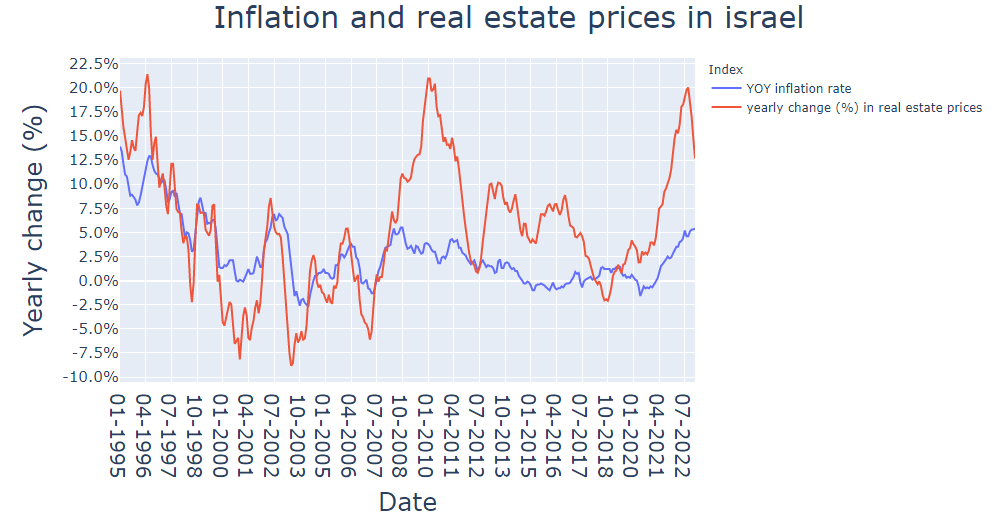

In [63]:
image_path = "C:\\Users\\guybl\\PycharmProjects\\israel_real_estate\\anlysis\\is_real_estate_a_good_inflation_hedge\\chart1.png"
Image(filename=image_path)

In [30]:
correlation = round(df['inflation'].corr(df['price_change']), 3)
display(Markdown((f"#### We can see a positive correlation between real estate prices and inflation. The correlation found is: {correlation}. In other words, for every 1% change in real estate prices, we\"ll expect to see {correlation}% change in the inflation.")))

#### We can see a positive correlation between real estate prices and inflation. The correlation found is: 0.569. In other words, for every 1% change in real estate prices, we"ll expect to see 0.569% change in the inflation.

In [42]:
# corr in high\low inflation environment
df['dt'] = pd.to_datetime(df['dt'])
display(Markdown((f"#### By looking at the chart, we can see that before 2008 the correlation was much higher than after. As a result, I decided to calculated them separately.")))
df_before_may_2008 = df[df['dt'] < datetime(year=2005, month=5, day=1)]
correlation_beofre_may_2008 = round(df_before_may_2008['inflation'].corr(df_before_may_2008['price_change']), 3)
df_after_may_2008 = df[df['dt'] > datetime(year=2005, month=5, day=1)]
correlation_after_may_2008 = round(df_after_may_2008['inflation'].corr(df_after_may_2008['price_change']), 3)
df_for_fig = pd.DataFrame({'correlation between CPI and real estate prices': [correlation_beofre_may_2008, correlation_after_may_2008],
                   'time':['before May 2008', 'after May 2008']})
fig = px.bar(df_for_fig, y="time", x='correlation between CPI and real estate prices', color="time",
             title="correlation between CPI and real estate prices before and after May 2008",
             text="correlation between CPI and real estate prices", orientation='h')
fig.update_layout(yaxis={'visible': True, 'showticklabels': True, 'title':""})
fig.update_layout(title_x=0.5, titlefont=dict(size=20))
fig.show()

#### By looking at the chart, we can see that before 2008 the correlation was much higher than after. As a result, I decided to calculated them separately.

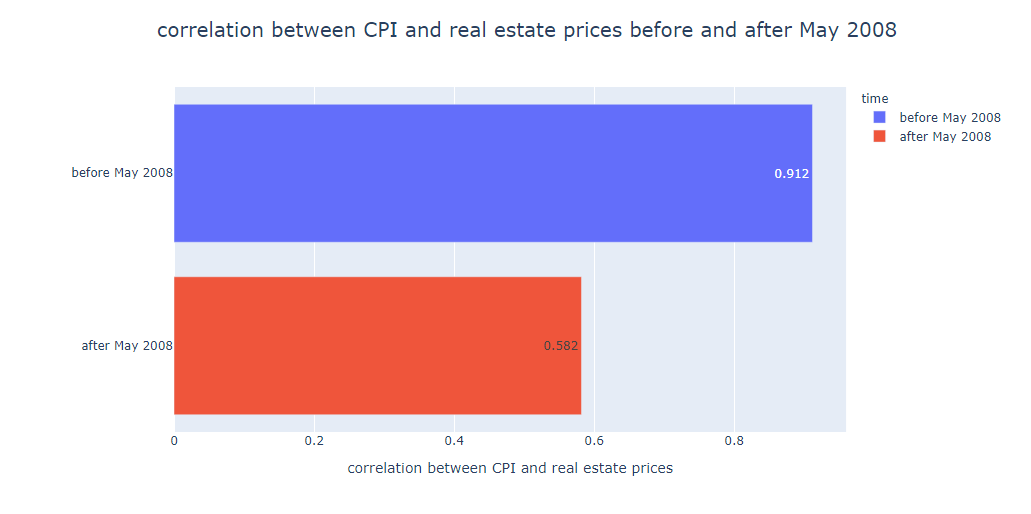

In [66]:
image_path = "C:\\Users\\guybl\\PycharmProjects\\israel_real_estate\\anlysis\\is_real_estate_a_good_inflation_hedge\\chart2.png"
Image(filename=image_path)

#### From this comparison I can assume that in high inflation environment real estate prices tend to move with inflation.
#### Another major factor that can help us understand the issue is the interest rate, but the the purpose of this analysis is to investigate whether real estate is a good inflation hedge or not.

In [45]:
# holding value
hold_value_months = len(df.loc[df['price_change'] > df['inflation']]) * 100
hold_value_percentage = round((hold_value_months/len(df)), 3)
display(Markdown((f"#### The yearly change in real estate price was higher than the yearly inflation rate in {hold_value_percentage}% of the months explored.")))
display(Markdown((f"#### Holding real estate might help avoiding the decrease in value of your money, but it will not protect you from our neighbors, and the lack of peace in the middle east.")))
display(Markdown((f"#### Therefore, I would ask the same question again, excluding the second intifada (september 2000 to february 2005), all other war periods in the time we are looking at where shorter than 2 month, and affected mainly the south/north of the country.")))
df_no_war = df[(df['dt'] < datetime(year=2000, month=9, day=1))|(df['dt'] > datetime(year=2005, month=2, day=1))]
no_war_hold_value_months = len(df_no_war.loc[df_no_war['price_change'] > df_no_war['inflation']]) * 100
no_war_hold_value_percentage = round((no_war_hold_value_months/len(df_no_war)), 3)
display(Markdown((f"#### When we exclude the war periods, in {no_war_hold_value_percentage}% of the months the yearly change in real estate prices was higher than inflation.")))
display(Markdown((f"#### This means that real estate value in average went up in real term (inflation adjusted) {no_war_hold_value_percentage}% of the months")))

#### The yearly change in real estate price was higher than the yearly inflation rate in 63.205% of the months explored.

#### Holding real estate might help avoiding the decrease in value of your money, but it will not protect you from our neighbors, and the lack of peace in the middle east.

#### Therefore, I would ask the same question again, excluding the second intifada (september 2000 to february 2005), all other war periods in the time we are looking at where shorter than 2 month, and affected mainly the south/north of the country.

#### When we exclude the war periods, in 71.731% of the months the yearly change in real estate prices was higher than inflation.

#### This means that real estate value in average went up in real term (inflation adjusted) 71.731% of the months

In [46]:
df_for_fig = pd.DataFrame({'Hold value percentage': [hold_value_percentage, no_war_hold_value_percentage],
                   'time':['All times', 'No war time']})
fig = px.bar(df_for_fig, y="time", x='Hold value percentage', color="time",
             title="Real estate holding value percentage exculding vs not excluding war times",
             text="Hold value percentage", orientation='h')
fig.update_layout(yaxis={'visible': True, 'showticklabels': True, 'title':""})
fig.update_layout(title_x=0.5, titlefont=dict(size=20))
fig.show()

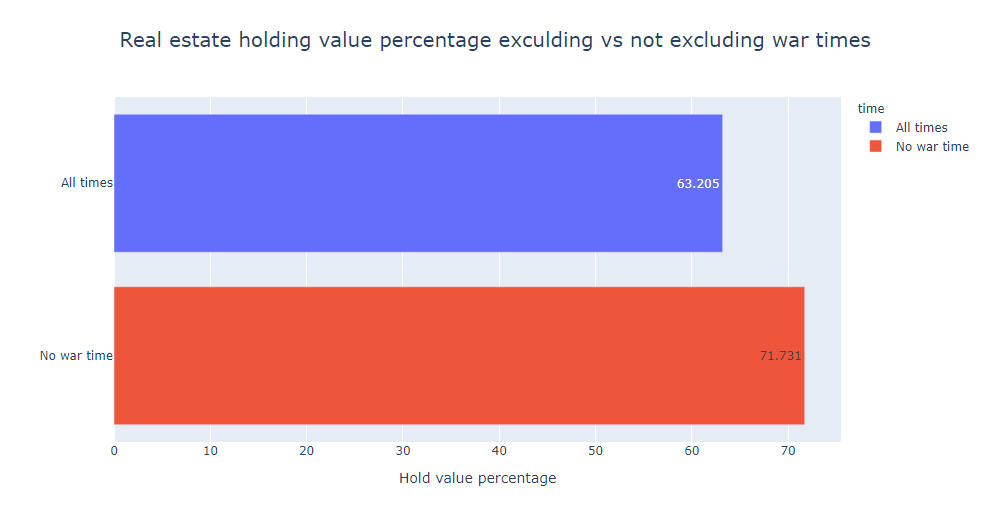

In [67]:
image_path = "C:\\Users\\guybl\\PycharmProjects\\israel_real_estate\\anlysis\\is_real_estate_a_good_inflation_hedge\\chart3.png"
Image(filename=image_path)

In [51]:
cpi_2_years_df = get_cpi(look_back_window=60)
real_estate_2_years_df = get_price_change(look_back_window=60, source_path=real_estate_df_path)
df_2_years_changes = cpi_2_years_df.merge(real_estate_2_years_df, left_on='date', right_on='date')
df_2_years_changes = df_2_years_changes.dropna(how='any', axis=0)
hold_value_months = len(df_2_years_changes.loc[df_2_years_changes['price_change'] > df_2_years_changes['inflation']])
hold_value_percentage = round((hold_value_months/len(df_2_years_changes)), 4)
fig = px.pie(values=[1-hold_value_percentage,hold_value_percentage],
             names=['inflation adjusted real estate price decrease', 'inflation adjusted real estate price increase'],
            title = "Inflation adjusted price increase in 5 years periods")
fig.update_layout(title_x=0.5, titlefont=dict(size=20))
fig.show()
display(Markdown((f"#### I chose to look at 5 years periods, because this a reasonable time period for an investment. We can understand from this chart that in many time periods real estate was not a good hedge against inflation. Yet, this comparison does not distinguish between 0.001% real prices decrease and 10% real prices decrease. ")))

#### I chose to look at 5 years periods, because this a reasonable time period for an investment. We can understand from this chart that in many time periods real estate was not a good hedge against inflation. Yet, this comparison does not distinguish between 0.001% real prices decrease and 10% real prices decrease. 

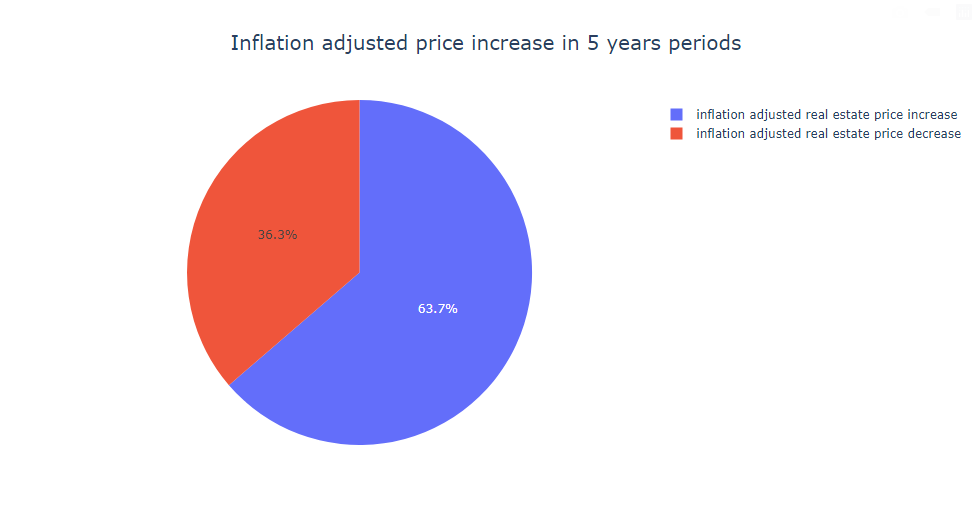

In [68]:
image_path = "C:\\Users\\guybl\\PycharmProjects\\israel_real_estate\\anlysis\\is_real_estate_a_good_inflation_hedge\\chart4.png"
Image(filename=image_path)

In [50]:
df['inflation_adjusted_real_estate_price_increase'] = df['price_change'] - df['inflation']
fig = px.box(df, y="inflation_adjusted_real_estate_price_increase",
             points="all")
fig.update_layout(yaxis=dict(tickfont=dict(size=15),
                             tickvals=[x * 2.5 for x in range(-4, 9)],
                             ticktext=[str(round(x * 2.5, 1)) + '%' for x in range(-4, 9)],
                             titlefont=dict(size=15)))
fig.update_layout(title_text="Inflation adjusted real estate price increase", title_x=0.5, titlefont=dict(size=30),
                  yaxis_title='')
fig.show()

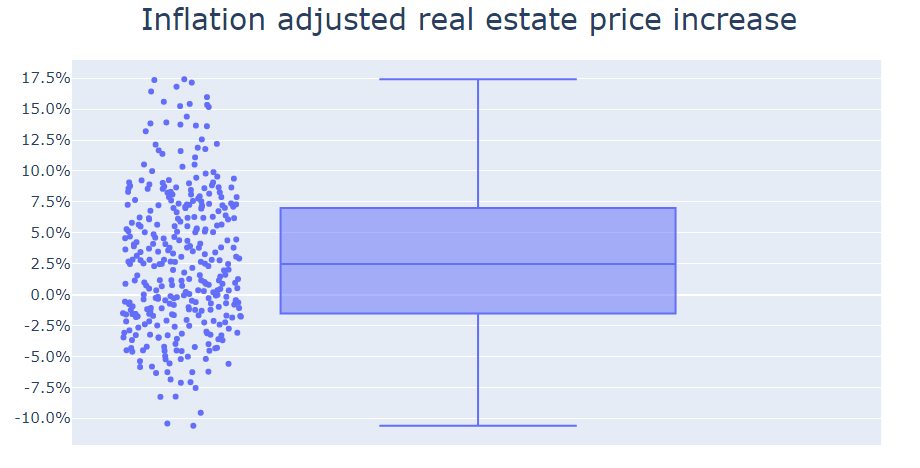

In [69]:
image_path = "C:\\Users\\guybl\\PycharmProjects\\israel_real_estate\\anlysis\\is_real_estate_a_good_inflation_hedge\\chart5.png"
Image(filename=image_path)

#### We can see in this chart that in 75% of the months the yearly inflation adjusted price change was higher than -1.52%, therefore I can say that real estate is a good inflation hedge most times, but certainly not always. 

#### To conclude, real estate is a good hedge against inflation most times, but there is no way to invest in the real estate price index, and there are many factors that will effect each deal such us the: area, city, number rooms and many other parameters. in the next analysis I will dive into the best areas and number of rooms to invest in. 